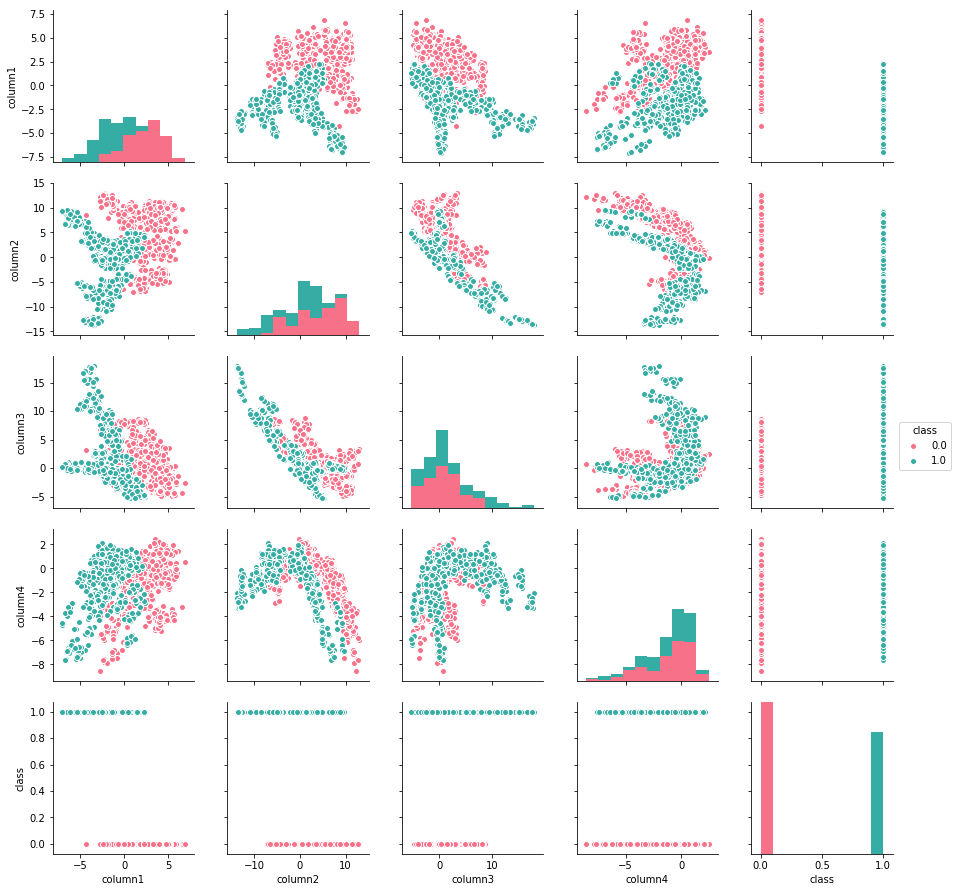

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
data=pd.read_csv('data_banknote_authentication.txt',header=None)
data=pd.DataFrame(np.array(data),columns=['column1','column2','column3','column4','class'])
sns.pairplot(data, hue="class", palette="husl")

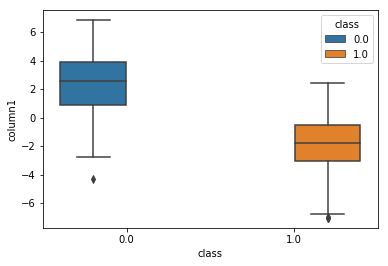

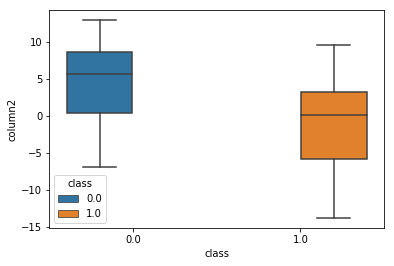

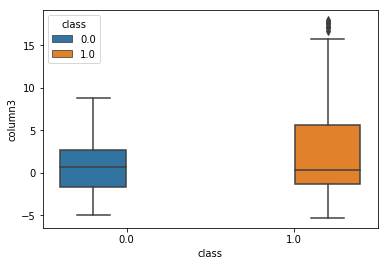

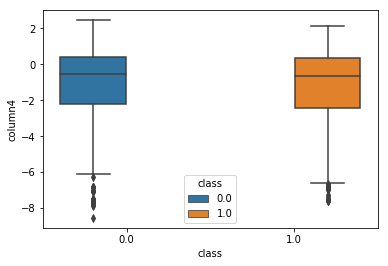

In [6]:
import matplotlib.pyplot as plt
data=pd.read_csv('data_banknote_authentication.txt',header=None)
data=pd.DataFrame(np.array(data),columns=['column1','column2','column3','column4','class'])
b1=sns.boxplot(x=data['class'], y=data['column1'],hue=data['class'])
plt.show()
b2=sns.boxplot(x=data['class'], y=data['column2'],hue=data['class'])
plt.show()
b3=sns.boxplot(x=data['class'], y=data['column3'],hue=data['class'])
plt.show()
b4=sns.boxplot(x=data['class'], y=data['column4'],hue=data['class'])
plt.show()



In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('data_banknote_authentication.txt',header=None)
data=pd.DataFrame(np.array(data),columns=['c1','c2','c3','c4','c5'])
class_0_length=len(data.loc[data['c5']==0])
class_1_length=len(data.loc[data['c5']==1])
d1_test=data.loc[data['c5']==0][0:200]
d2_test=data.loc[data['c5']==1][0:200]
frames_test = [d1_test, d2_test]
test=pd.concat(frames_test)
d1_train=data.loc[data['c5']==0][201:class_0_length]
d2_train=data.loc[data['c5']==1][201:class_1_length]
frames_train = [d1_train, d2_train]
train=pd.concat(frames_train)
print("Test Data")
print(test)
print("Train Data")
print(train)



Test Data
           c1        c2         c3        c4   c5
0    3.621600   8.66610  -2.807300 -0.446990  0.0
1    4.545900   8.16740  -2.458600 -1.462100  0.0
2    3.866000  -2.63830   1.924200  0.106450  0.0
3    3.456600   9.52280  -4.011200 -3.594400  0.0
4    0.329240  -4.45520   4.571800 -0.988800  0.0
5    4.368400   9.67180  -3.960600 -3.162500  0.0
6    3.591200   3.01290   0.728880  0.564210  0.0
7    2.092200  -6.81000   8.463600 -0.602160  0.0
8    3.203200   5.75880  -0.753450 -0.612510  0.0
9    1.535600   9.17720  -2.271800 -0.735350  0.0
10   1.224700   8.77790  -2.213500 -0.806470  0.0
11   3.989900  -2.70660   2.394600  0.862910  0.0
12   1.899300   7.66250   0.153940 -3.110800  0.0
13  -1.576800  10.84300   2.546200 -2.936200  0.0
14   3.404000   8.72610  -2.991500 -0.572420  0.0
15   4.676500  -3.38950   3.489600  1.477100  0.0
16   2.671900   3.06460   0.371580  0.586190  0.0
17   0.803550   2.84730   4.343900  0.601700  0.0
18   1.447900  -4.87940   8.342800 -2.10

Vaue of k is
19
Confusion Matrix:
[[200   0]
 [  0 200]]


Text(0,0.5,'Train Error')

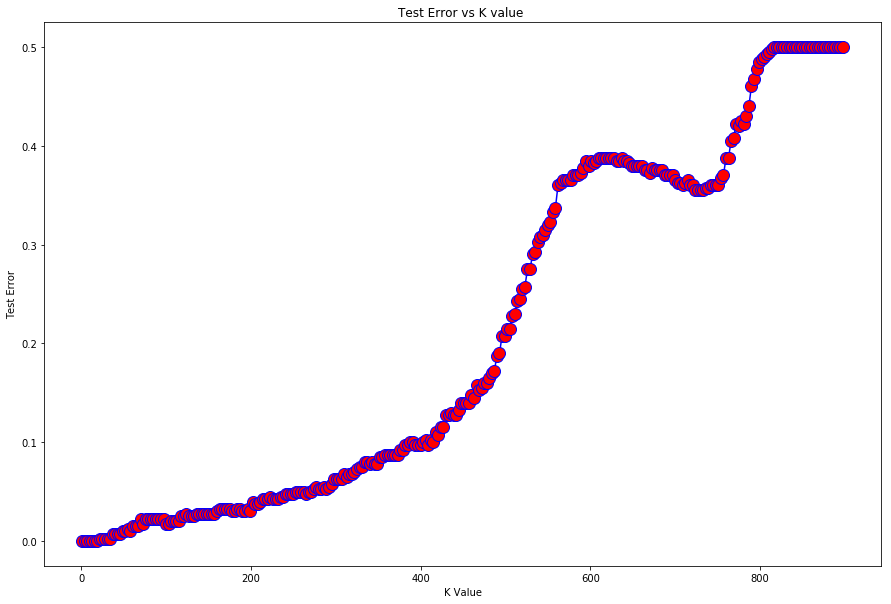

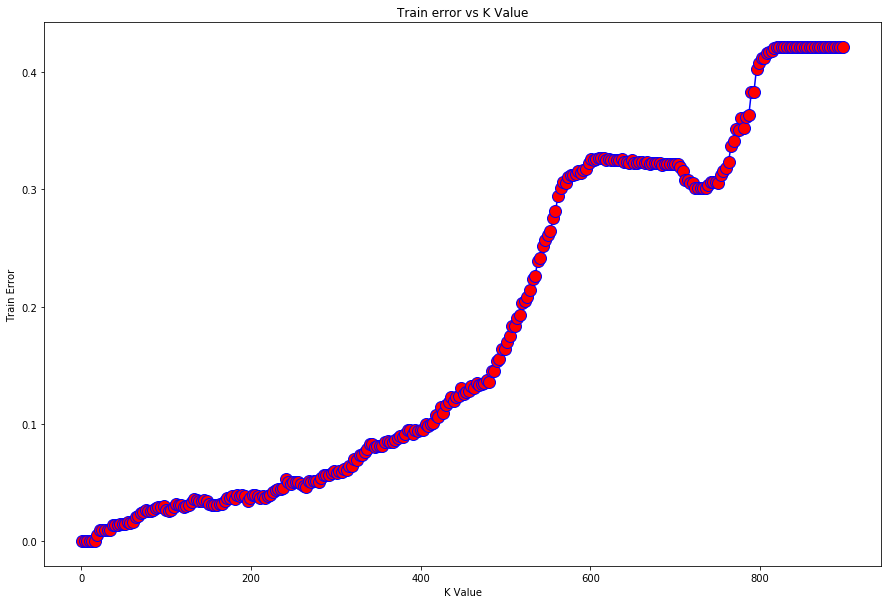

In [10]:
X_test = test.iloc[:, :-1].values  
y_test = test.iloc[:, 4].values 
X_train = train.iloc[:, :-1].values  
y_train = train.iloc[:, 4].values
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
score = []
k_values=[]
error_test=[]
error_train=[]
for i in range(1,901,3):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred_test = knn.predict(X_test)
    y_pred_train = knn.predict(X_train)
    error_test.append(np.mean(y_pred_test != y_test))
    error_train.append(np.mean(y_pred_train != y_train))
    score.append(accuracy_score(y_test,y_pred_test))
    k_values.append(i) 

score_rev=score[::-1]
rev_ind=score_rev.index(max(score_rev))
index=len(score)-rev_ind-1
print("Vaue of k is")
print(k_values[index])

from sklearn.metrics import confusion_matrix 
knn2 = KNeighborsClassifier(n_neighbors=k_values[index])
knn2.fit(X_train, y_train)
y_pred = knn2.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
    

plt.figure(figsize=(15, 10))  
plt.plot(range(1,901,3),error_test,color='blue', marker='o',  markerfacecolor='red', markersize=12)
plt.title('Test Error vs K value ')  
plt.xlabel('K Value')  
plt.ylabel('Test Error') 

plt.figure(figsize=(15, 10)) 
plt.plot(range(1,901,3),error_train,color='blue', marker='o',  markerfacecolor='red', markersize=12)
plt.title('Train error vs K Value')  
plt.xlabel('K Value')  
plt.ylabel('Train Error') 


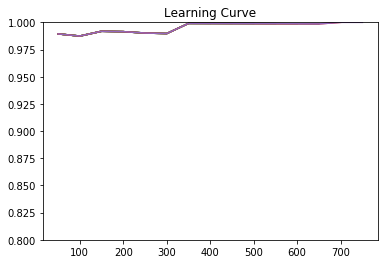

In [11]:
class_0_length=len(data.loc[data['c5']==0])
class_1_length=len(data.loc[data['c5']==1])
No=[]
accuracy_val=[]
for N in range (50,800,50):
    samples=[] 
    score=[]
    d1_train=data.loc[data['c5']==0][0:(N//2)]
    d2_train=data.loc[data['c5']==1][0:(N//2)]
    frames_train = [d1_train, d2_train]
    train=pd.concat(frames_train)
    X_train = train.iloc[:, :-1].values  
    y_train = train.iloc[:, 4].values
    d1_test=data.loc[data['c5']==0][((N//2) + 1):class_0_length]
    d2_test=data.loc[data['c5']==1][((N//2) + 1):class_1_length]
    frames_test = [d1_test, d2_test]
    test=pd.concat(frames_test)
    X_test = test.iloc[:, :-1].values  
    y_test = test.iloc[:, 4].values 
    for i in range(1,N,40):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        score.append(accuracy_score(y_test,y_pred))
        samples.append(i)
    #max_accuracy=score.index(max(score))   
    No.append(N)
    accuracy_val.append(max(score))
    #print(accuracy_val)
    #print(No)
    plt.plot(No,accuracy_val)
    plt.ylim(0.8,1)
    plt.title("Learning Curve")

Best test error for Manhattan distance =
0.0
k=
11


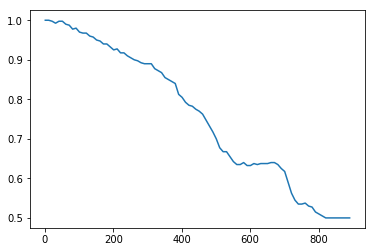

In [14]:
class_0_length=len(data.loc[data['c5']==0])
class_1_length=len(data.loc[data['c5']==1])
d1_test=data.loc[data['c5']==0][0:200]
d2_test=data.loc[data['c5']==1][0:200]
frames_test = [d1_test, d2_test]
test=pd.concat(frames_test)
d1_train=data.loc[data['c5']==0][201:class_0_length]
d2_train=data.loc[data['c5']==1][201:class_1_length]
frames_train = [d1_train, d2_train]
train=pd.concat(frames_train)
X_test = test.iloc[:, :-1].values  
y_test = test.iloc[:, 4].values 
X_train = train.iloc[:, :-1].values  
y_train = train.iloc[:, 4].values 
from sklearn.neighbors import KNeighborsClassifier 
score = []
k_values=[]
 
for i in range(1,901,10):  
    knn = KNeighborsClassifier(n_neighbors=i,p=1)   #Minkowski with p=1 ie Manhattan distance
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))
    k_values.append(i)

score_rev=score[::-1]
score_index_rev=score_rev.index(max(score_rev))
score_index=len(score)-score_index_rev-1
best_test_error=1 -max(score)
print("Best test error for Manhattan distance =")
print(best_test_error)
print("k=")
print(k_values[score_index])
plt.plot(k_values,score)    

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from astropy.table import Table, Column
data=pd.read_csv('data_banknote_authentication.txt',header=None)
data=pd.DataFrame(np.array(data),columns=['c1','c2','c3','c4','c5'])
class_0_length=len(data.loc[data['c5']==0])
class_1_length=len(data.loc[data['c5']==1])
d1_test=data.loc[data['c5']==0][0:200]
d2_test=data.loc[data['c5']==1][0:200]
frames_test = [d1_test, d2_test]
test=pd.concat(frames_test)
d1_train=data.loc[data['c5']==0][201:class_0_length]
d2_train=data.loc[data['c5']==1][201:class_1_length]
frames_train = [d1_train, d2_train]
train=pd.concat(frames_train)
X_test = test.iloc[:, :-1].values  
y_test = test.iloc[:, 4].values 
X_train = train.iloc[:, :-1].values  
y_train = train.iloc[:, 4].values 
from sklearn.neighbors import KNeighborsClassifier 

score = []
P_no= []

t = [10**0.1,10**0.2,10**0.3,10**0.4,10**0.5,10**0.6,10**0.7,10**0.8,10**0.9,10**1]

for x in t:
    knn = KNeighborsClassifier(n_neighbors=11,metric='minkowski', p=x,algorithm="ball_tree")
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))
score_rev=score[::-1]
score_index_rev=score_rev.index(max(score_rev))
score_index=len(score)-score_index_rev-1
best_test_error=1 -max(score)
print("Best test error for log 10 distance =")
print(best_test_error)
print("Accuracy scores for all values of p are")
print(score)

Best test error for log 10 distance =
0.0
Accuracy scores for all values of p are
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Best Chebyshev test error =
0.0
k=
11


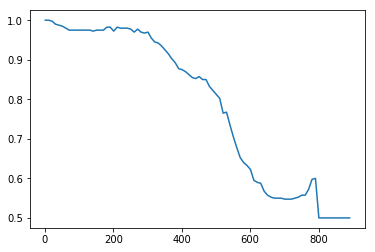

In [34]:
score = []
k_values=[]
 
for i in range(1,901,10):  
    knn = KNeighborsClassifier(n_neighbors=i,metric="chebyshev")   #Chebyshev Distance
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))
    k_values.append(i)
score_rev=score[::-1]
score_index_rev=score_rev.index(max(score_rev))
score_index=len(score)-score_index_rev-1
best_test_error=1 -max(score)
print("Best Chebyshev test error =")
print(best_test_error)
print("k=")
print(k_values[score_index])
plt.plot(k_values,score)  

Best Mahalanobis test error =
0.0
k=
11


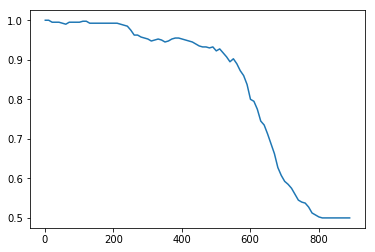

In [33]:
score = []
k_values=[]
 
for i in range(1,901,10):  
    knn = KNeighborsClassifier(n_neighbors=i,metric="mahalanobis",metric_params={'V': np.cov(X_train.T)}) #Mahalanobis distance
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))
    k_values.append(i)
score_rev=score[::-1]
score_index_rev=score_rev.index(max(score_rev))
score_index=len(score)-score_index_rev-1
best_test_error=1 -max(score)
print("Best Mahalanobis test error =")
print(best_test_error)
print("k=")
print(k_values[score_index])
plt.plot(k_values,score)

Best Euclidian Weighted test error =
0.0


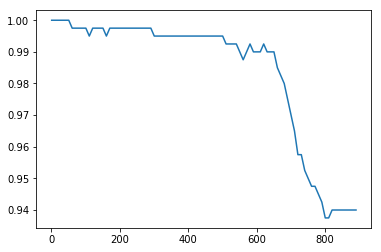

In [27]:
from sklearn.neighbors import KNeighborsClassifier 
score = []
k_values=[]
 
for i in range(1,901,10):  
    knn = KNeighborsClassifier(n_neighbors=i,weights='distance')   
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))
    k_values.append(i)

best_test_error=1 -max(score)
print("Best Euclidian Weighted test error =")
print(best_test_error)
plt.plot(k_values,score)    

Best Manhattan Weighted test error =
0.0


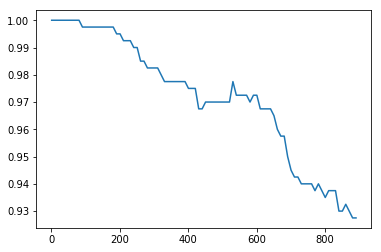

In [28]:
score = []
k_values=[]
 
for i in range(1,901,10):  
    knn = KNeighborsClassifier(n_neighbors=i,weights='distance',p=1)   
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))
    k_values.append(i)

best_test_error=1 -max(score)
print("Best Manhattan Weighted test error =")
print(best_test_error)
plt.plot(k_values,score)    

Best Chebyshev weighted test error =
0.0


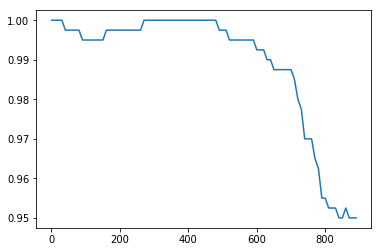

In [32]:
from sklearn.neighbors import KNeighborsClassifier 
score = []
k_values=[]
 
for i in range(1,901,10):  
    knn = KNeighborsClassifier(n_neighbors=i,weights='distance',metric='chebyshev',algorithm="ball_tree")   
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))
    k_values.append(i)

best_test_error=1 -max(score)
print("Best Chebyshev weighted test error =")
print(best_test_error)
plt.plot(k_values,score)    